# SLR MID EXAM

### Data_set: 
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [3]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    reader=csv.reader(file)
    df=pd.read_csv("data_set.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Data Understanding (8 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK) 

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks) 

d. Check for defects in the data such as missing values, null, outliers, etc. (4 marks) 

In [15]:
#1. (a)

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
print('The total number of rows and columns are as follows :')
print()
print('Shape of the data set is :', df.shape)
print()
print('Number of columns :', df.shape[1])
print()
print('Number of rows :', df.shape[0])

The total number of rows and columns are as follows :

Shape of the data set is : (159, 7)

Number of columns : 7

Number of rows : 159


In [20]:
cat_col = df.select_dtypes('object')
num_col = df.select_dtypes(np.number)

print('Categorical columns are :', cat_col.columns)
print()
print('Numerical columns are :', num_col.columns)

Categorical columns are : Index(['Species'], dtype='object')

Numerical columns are : Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


In [21]:
# 1 (b)

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [23]:
# 1 (c)

cat_col = df.select_dtypes('object')

print('The number of observation for categorical columns are :', cat_col.shape[0])

The number of observation for categorical columns are : 159


In [26]:
for i in cat_col.columns:
    print('The number of categories in', i, 'is :')
    print(df[i].value_counts().count())
    print()
    print('% of observations in each category :')
    print(df[i].value_counts(normalize = True)* 100)

The number of categories in Species is :
7

% of observations in each category :
Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: Species, dtype: float64


In [27]:
# 1 (d)

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

INFERENCE : 

From the above result, we can say that ther are no null values in the entire dataset

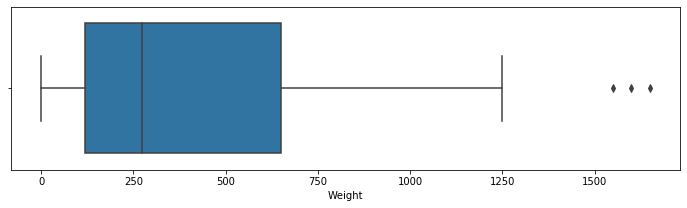

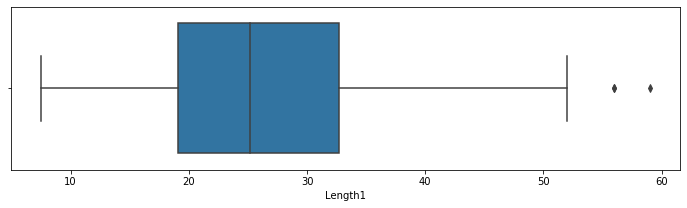

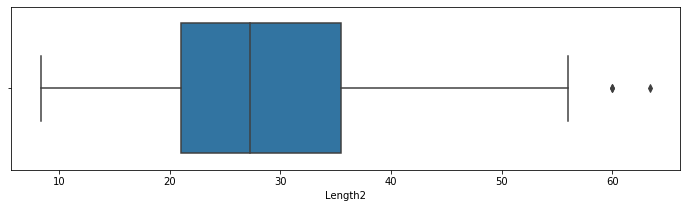

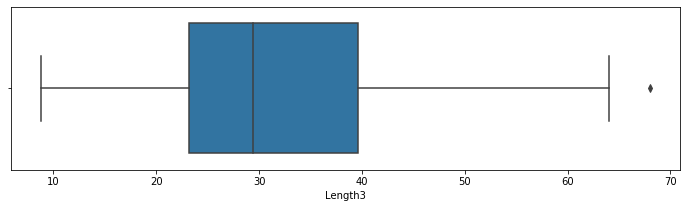

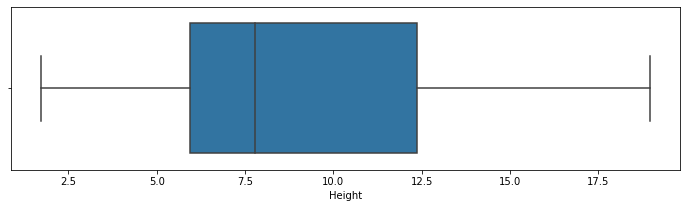

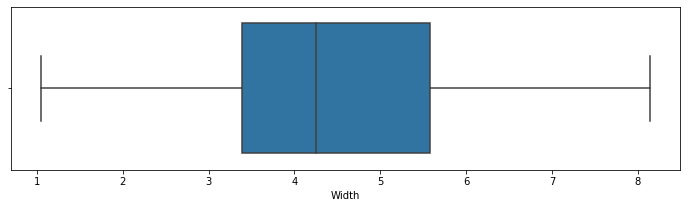

In [28]:
num_col = df.select_dtypes(np.number)

for i in num_col.columns:
    plt.figure(figsize = (12, 3))
    sns.boxplot(df[i])
    plt.show()

INFERENCE :

We found outliers in few columns weight column has 3 outliers, Length1 and Length2 columns has 2 outliers each and 
Length3 column has only 1 outlier.

In [30]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

INFERENCE : 

There are no name error in the columns. All details are good.

### 2. Data Preparation (17 marks) 

a. Fix the defects found above and do appropriate treatment if any. (4 marks) 

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks) 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (4 marks) 

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks) 
 

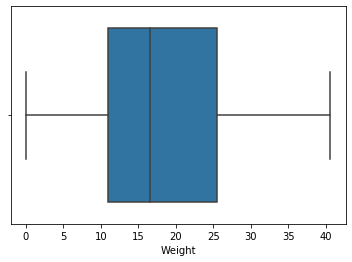

In [31]:
# 2 (a)

df['Weight'] = np.sqrt(df['Weight'])
sns.boxplot(df['Weight'])
plt.show()

INFERENCE : 

After the square-root transformation on the weight column, the outliers are reduced.

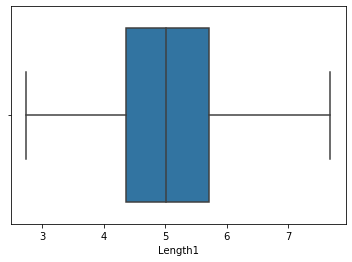

In [33]:
df['Length1'] = np.sqrt(df['Length1'])
sns.boxplot(df['Length1'])
plt.show()

INFERENCE : 

After the square-root transformation on the Length1 column, the outliers are reduced.

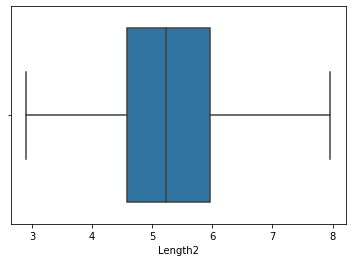

In [34]:
df['Length2'] = np.sqrt(df['Length2'])
sns.boxplot(df['Length2'])
plt.show()

INFERENCE : 

After the square-root transformation on the Length2 column, the outliers are reduced.

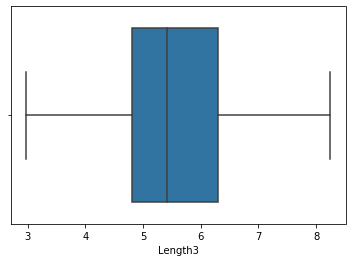

In [35]:
df['Length3'] = np.sqrt(df['Length3'])
sns.boxplot(df['Length3'])
plt.show()

INFERENCE : 

After the square-root transformation on the Length3 column, the outliers are reduced.

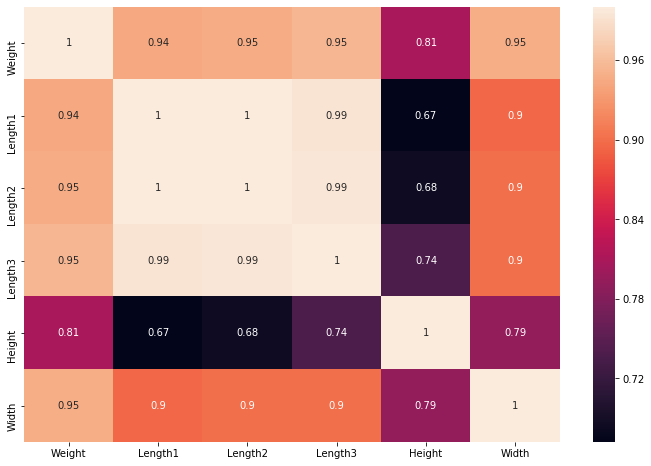

In [37]:
# 2 (b)

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

INFERENCE : 
    
From the above graph, we can see the target variable(weight) is highly correlated with all the independent variables which are continuous. So, it seems like all the numerical independent variables has high effect on the target variable. Also all numerical independent varaiable are positively correlated to the target variable, which means if any numerical target variable increases, then the weight(target variable) increases. Now let's check the impact of categorical columns on the target variable.

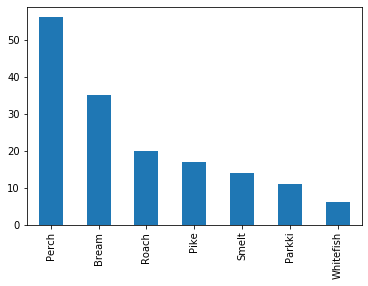

In [38]:
# Now let's check the impact of categorical columns on the target variable.

df['Species'].value_counts().plot(kind = 'bar')
plt.show()

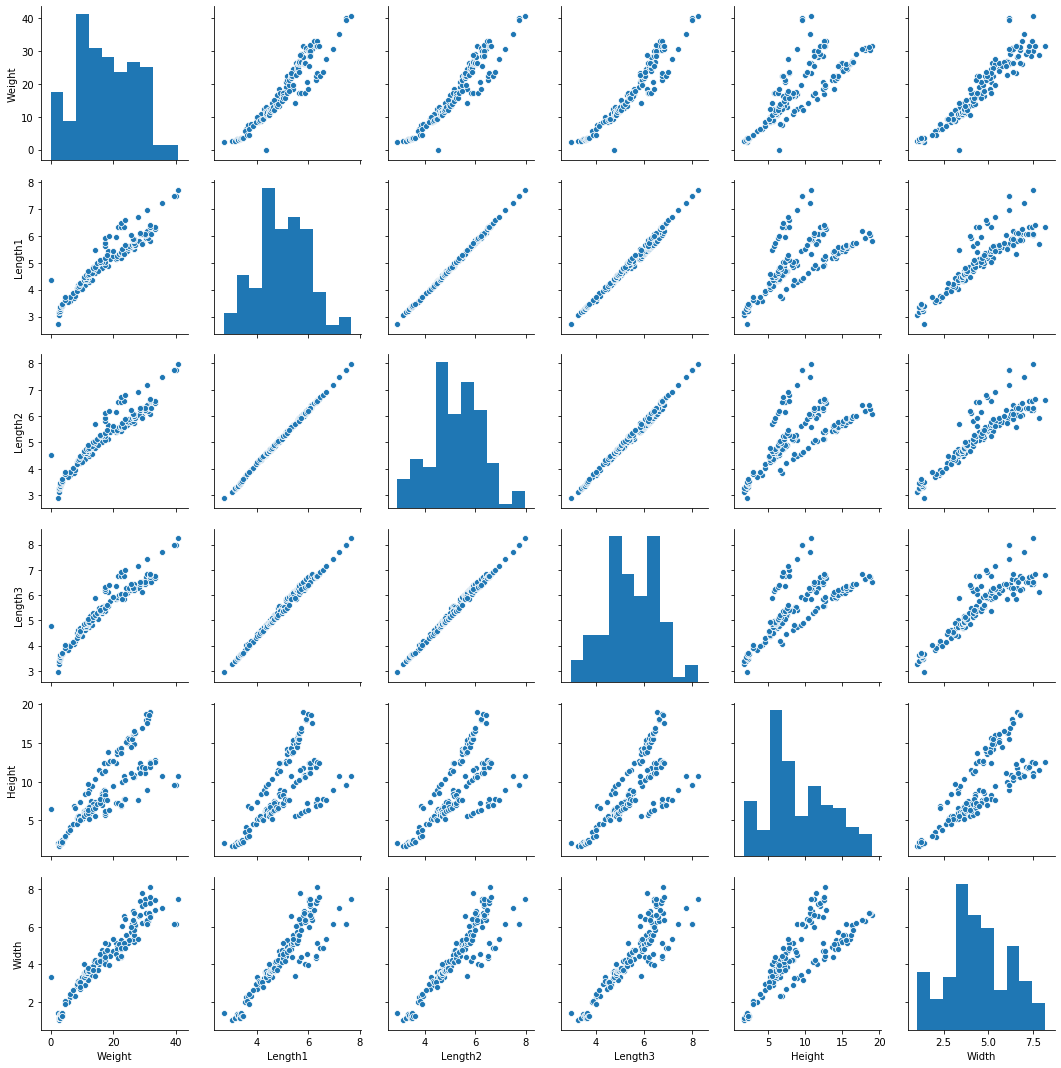

In [39]:
sns.pairplot(df)
plt.show()

In [41]:
# 2 (d)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 4)

print(df_train.shape)
print(df_test.shape)

(111, 7)
(48, 7)


In [45]:
# To check the test and train data comparision, let's do independent - two sample test.

y = df['Weight']
x = df.drop(['Weight'], axis = 1)

# Converting the categorical column to dummy variable using get dummies

x = pd.get_dummies(x, drop_first = True)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 4)
print('Shape of x train :',x_train.shape)
print('Shape of x test :',x_test.shape)
print('Shape of y train :',y_train.shape)
print('Shape of y test :',y_test.shape)

Shape of x train : (111, 11)
Shape of x test : (48, 11)
Shape of y train : (111,)
Shape of y test : (48,)


In [46]:
from scipy.stats import ttest_ind

ttest_ind(y_train, y_test)

Ttest_indResult(statistic=-1.8086777386527553, pvalue=0.07241455157316527)

In [47]:
from scipy.stats import ttest_ind

ttest_ind(x_train, x_test)

Ttest_indResult(statistic=array([-1.02214747, -1.05513927, -1.24371137, -2.38174734, -1.39939378,
        0.21700804,  0.32558482,  0.62967912,  0.01953427,  1.35660556,
        1.6457083 ]), pvalue=array([0.30828352, 0.29298264, 0.21545963, 0.01842824, 0.1636676 ,
       0.82848383, 0.74517201, 0.52981982, 0.98443971, 0.17685407,
       0.10182433]))

INFERENCE : 

From the above statistical test, we can confirm that pvalue and the train pvalues are greater than 0.05. So, we can accept the null hypothesis(Ho). Hence the train and test data is the representation of the overall data.

### 3. Model Building (25 marks) 

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (6 marks) 

b. Check for multi-collinearity and treat the same. (4 marks) 

c. How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.   (7 marks) 

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)  

e. What changes from the base model had the most effect on model performance? (4 marks) 

In [64]:
# 3 (a)

import statsmodels.api as sm

y = df['Weight']
x = df.drop(['Weight'], axis = 1)
x1 = pd.get_dummies(x, drop_first = True)

Xc = sm.add_constant(x1)
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     428.2
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          1.09e-105
Time:                        06:27:33   Log-Likelihood:                -300.20
No. Observations:                 159   AIC:                             624.4
Df Residuals:                     147   BIC:                             661.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.9439      3.455     -6.931      0.000     -30.771     -17.116
Length1              -0.4617      6.500     -0.071      0.943     -13.307      12.383
Length2               2.8285      8.243      0.343      0.732     -13.462      19.119
Length3               2.6473      5.793      0.457      0.648      -8.801      14.096
Height                0.6408      0.236      2.720      0.007       0.175       1.106
Width                 1.5896      0.433      3.674      0.000       0.735       2.445
Species_Parkki        1.8336      1.286      1.426      0.156      -0.707       4.374
Species_Perch         2.2512      2.247      1.002      0.318      -2.190       6.692
Species_Pike          1.9992      2.552      0.783      0.435      -3.044       7.043
Species_Roach         1.0924      1.662      0.657      0.512      -2.192       4.377
Species_Smelt         5.9463      2.240      2.655      0.009       1.519      10.373
Species_Whitefish     2.3021      1.783      1.291      0.199      -1.221       5.825
==============================================================================
Omnibus:                       52.480   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.180
Skew:                          -0.589   Prob(JB):                    9.18e-196
Kurtosis:                      14.584   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(Xc)
overall_r2 = r2_score(y, y_pred)
RMSE = np.sqrt(mean_squared_error(y, y_pred))
MAPE = np.mean(np.abs((y - y_pred) / y))

print('Overall r-square of the model is :', overall_r2)
print('Overall RMSE value of the model is : ', RMSE)
print('Overal MAPE of the model is : ', MAPE)

Overall r-square of the model is : 0.9697380526704849
Overall RMSE value of the model is :  1.5985770712186906
Overal MAPE of the model is :  inf


In [51]:
# 3 (b)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif = [vif(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index = Xc.columns, columns = ['vif'])

,vif
const,686.588152
Length1,2317.166045
Length2,3995.967121
Length3,2151.955625
Height,58.297210
Width,30.413182
Species_Parkki,6.121799
Species_Perch,66.274595
Species_Pike,35.774453
Species_Roach,17.471873


From the above vif values, we can say that there are many columns which have high multi-collinearity (vif > 10). Let's drop the variables which have vif > 50.

In [52]:
Xc = Xc.drop(['Length1', 'Length2', 'Length3', 'Height', 'Species_Perch'], axis = 1)
Xc.head()

,const,Width,Species_Parkki,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1.0,4.0200,0,0,0,0,0
1,1.0,4.3056,0,0,0,0,0
2,1.0,4.6961,0,0,0,0,0
3,1.0,4.4555,0,0,0,0,0
4,1.0,5.1340,0,0,0,0,0


In [53]:
# 3 (c)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     363.1
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           2.03e-87
Time:                        06:03:00   Log-Likelihood:                -361.24
No. Observations:                 159   AIC:                             736.5
Df Residuals:                     152   BIC:                             758.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.3764      0.811     -7.864      0.000      -7.978      -4.774
Width                 5.3080      0.154     34.484      0.000       5.004       5.612
Species_Parkki        1.3487      0.814      1.657      0.100      -0.260       2.957
Species_Pike          4.8295      0.634      7.614      0.000       3.576       6.083
Species_Roach        -1.3833      0.628     -2.202      0.029      -2.624      -0.142
Species_Smelt         2.5597      0.891      2.874      0.005       0.800       4.320
Species_Whitefish    -0.4244      1.014     -0.419      0.676      -2.428       1.579
==============================================================================
Omnibus:                       18.076   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.388
Skew:                           0.069   Prob(JB):                     1.16e-16
Kurtosis:                       6.325   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

INFERENCE : 

From the above summary, we can see that the pvalue of Species_Parkki = 0.100, pvalue of Species_Whitefish = 0.676 so as thesevariables had pvalue > 0.05, it is insignificant , so let's drop those variables, Remaining variables with pvalue < 0.05 are significant.

In [54]:
Xc = Xc.drop(['Species_Parkki', 'Species_Whitefish'], axis = 1)
Xc.head()

,const,Width,Species_Pike,Species_Roach,Species_Smelt
0,1.0,4.0200,0,0,0
1,1.0,4.3056,0,0,0
2,1.0,4.6961,0,0,0
3,1.0,4.4555,0,0,0
4,1.0,5.1340,0,0,0


In [56]:
# Now rebuild the model again. This is the final model

import statsmodels.api as sm

y = df['Weight']
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     540.5
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.66e-89
Time:                        06:11:56   Log-Likelihood:                -362.79
No. Observations:                 159   AIC:                             735.6
Df Residuals:                     154   BIC:                             750.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.8109      0.739     -7.860      0.000      -7.271      -4.350
Width             5.2149      0.145     36.041      0.000       4.929       5.501
Species_Pike      4.7375      0.629      7.530      0.000       3.495       5.980
Species_Roach    -1.6083      0.611     -2.632      0.009      -2.815      -0.401
Species_Smelt     2.1190      0.852      2.487      0.014       0.436       3.802
==============================================================================
Omnibus:                       17.190   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.258
Skew:                           0.049   Prob(JB):                     4.10e-15
Kurtosis:                       6.161   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

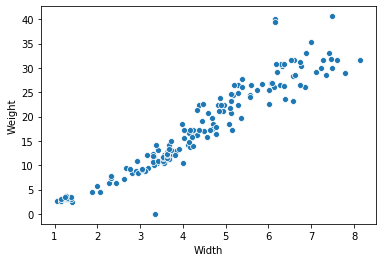

In [58]:
# 3 (d)

sns.scatterplot(Xc['Width'],y)
plt.show()

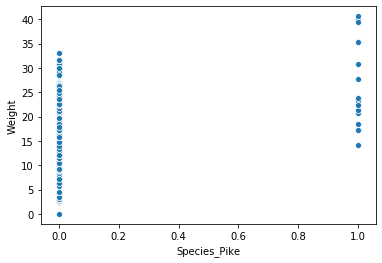

In [59]:
sns.scatterplot(Xc['Species_Pike'], y)
plt.show()

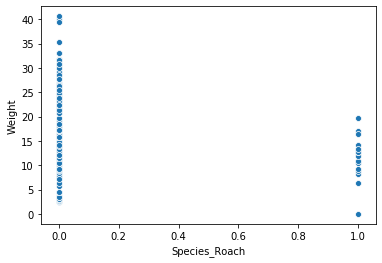

In [60]:
sns.scatterplot(Xc['Species_Roach'], y)
plt.show()

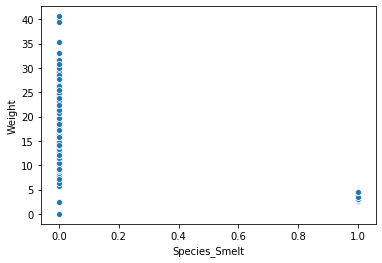

In [61]:
sns.scatterplot(Xc['Species_Smelt'], y)
plt.show()

INFERENCE : 
    
Width is highly correlated with weight(target variable)
#3 (d) From the above final model, Durbin-Watson value = 0.932 which is little close to 2, so we can say there is very slight autocorrelation between the residuals. Condition no 26.9 < 100, so, there is no much multi- Collinearity, overall skewness = 0.049 which is close to 0 so, our final model follows the normal distribution.

In [62]:
# 3 (e)

y_pred = model.predict(Xc)
overall_r2 = r2_score(y, y_pred)
print('Overall r-square of the model is :', overall_r2)

Overall r-square of the model is : 0.9335004592021383


INFERENCE : 

Multi-collinearity has high effect on the model performance. After removing the multi-clollinearity the model performance os very good with overall r-square of 0.934 which is very close to 1. So, our model is almost perfect now.